<a id = "Table_of_content"></a>
# Table of content
### 1. [Data Cleaning](#T1)
### 2. [Build the model](#T3)

# Objective
* predict the probability that a customer does not pay back their credit card balance

<a id = "T1"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Data Cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('train_59.csv')  
df_label = pd.read_csv("label_59.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27904 entries, 0 to 27903
Columns: 751 entries, Diff_date_0 to D_145_4
dtypes: float64(751)
memory usage: 159.9 MB


In [4]:
df_train.head(5)

,Diff_date_0,num_date,P_2_0,D_39_0,B_1_0,B_2_0,R_1_0,D_41_0,B_3_0,D_44_0,...,D_130_4,D_131_4,D_133_4,R_28_4,D_139_4,D_140_4,D_141_4,D_143_4,D_144_4,D_145_4
0,0.021563,0.692308,0.209219,0.682804,0.075066,0.116105,0.009367,0.212435,0.099941,0.382168,...,0.000506,0.005313,0.009390,0.003240,1.009989,0.001966,0.875536,1.008998,0.009901,1.093480
1,0.102426,0.615385,0.670203,0.238965,0.066434,0.275513,0.503648,0.009750,0.030044,0.134424,...,0.000265,0.001805,0.003882,0.003875,0.008639,0.007512,0.002536,0.008481,0.000773,0.003672
2,0.113208,0.615385,0.581898,0.004729,0.001673,0.819535,0.002745,0.007361,0.006951,0.126895,...,1.008012,0.987666,0.302090,0.003805,0.005230,0.008198,0.004536,0.004462,0.008460,0.000035
3,0.043127,0.538462,0.884160,0.009115,0.045651,0.419922,0.008867,0.007641,0.044311,0.008959,...,0.008512,0.001276,0.006942,0.001511,1.003795,0.005110,0.925654,1.007028,0.094978,0.546560
4,0.072776,0.538462,-0.059913,0.535663,0.108700,0.003085,0.256299,0.328761,0.009912,0.129758,...,0.001403,0.008408,0.002895,0.004831,0.007606,0.004791,0.004766,0.003089,0.005494,0.000370


In [5]:
df_num_date = df_train["num_date"] / 5
df_train = df_train.drop(columns =["num_date"])

df_train.insert(2,"num_date1",df_num_date)
df_train.insert(179,"num_date2",df_num_date)
df_train.insert(358,"num_date3",df_num_date)
df_train.insert(539,"num_date4",df_num_date)
df_train.insert(716,"num_date5",df_num_date)

row, col = df_train.shape
df_train = np.reshape(df_train.to_numpy(),(-1,5,151))
df_train.shape

(27904, 5, 151)

<a id = "T3"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Build the model

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling2D, Flatten,Dropout
from keras.callbacks import EarlyStopping

In [7]:
def process_x_y_train_valid(df_train, df_label, s):
    x_train = df_train[: int(df_train.shape[0] * 0.80)][..., None]
    x_valid = df_train[int(df_train.shape[0] * 0.80):][..., None]

    y_train = df_label[: int(df_label.shape[0] * 0.80)].to_numpy()
    y_train = np.reshape(y_train, (y_train.shape[0],))
    y_train = tf.one_hot(y_train, 2)
    
    y_valid = df_label[int(df_label.shape[0] * 0.80):].to_numpy()
    y_valid = np.reshape(y_valid, (y_valid.shape[0],))
    y_valid = tf.one_hot(y_valid, 2)
    
    print(f"For train dataset {s}: ", x_train.shape, y_train.shape)
    print(f"For validation dataset {s}: ", x_valid.shape, y_valid.shape,"\n")
    return x_train, y_train, x_valid, y_valid

In [8]:
x_train59, y_train59, x_valid59, y_valid59 = process_x_y_train_valid(df_train, df_label, "5_9")

For train dataset 5_9:  (22323, 5, 151, 1) (22323, 2)
For validation dataset 5_9:  (5581, 5, 151, 1) (5581, 2) 



In [1]:
def create_ANN(input_data):
    
    model = Sequential()
    model.add(Conv2D(128, (2,2), activation = 'relu', input_shape = input_data.shape[1:] ))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (2,2), activation = 'relu'))
#     model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = 'relu'))    
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = 'softmax'))
    
    return model

Way to write the model to json file: https://machinelearningmastery.com/save-load-keras-deep-learning-models/   

In [10]:
ANN_5_9 = create_ANN(x_train59)
print(ANN_5_9.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 4, 150, 128)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 75, 128)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 74, 128)        65664     
                                                                 
 flatten (Flatten)           (None, 9472)              0         
                                                                 
 dense (Dense)               (None, 64)                606272    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [11]:
callbacks = [EarlyStopping(monitor = 'val_accuracy', patience = 2, min_delta = 0, mode = 'auto')]
ANN_5_9.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics = ['accuracy'])

# Try without callback
history = ANN_5_9.fit(x_train59, y_train59, batch_size = 64, epochs = 50, validation_data = (x_valid59, y_valid59), verbose=1, callbacks = callbacks)

Epoch 1/50
349/349 [==============================] - 24s 66ms/step - loss: 0.4806 - accuracy: 0.7834 - val_loss: 0.4286 - val_accuracy: 0.7984
Epoch 2/50
349/349 [==============================] - 23s 67ms/step - loss: 0.4143 - accuracy: 0.8185 - val_loss: 0.3953 - val_accuracy: 0.8183
Epoch 3/50
349/349 [==============================] - 23s 65ms/step - loss: 0.4022 - accuracy: 0.8242 - val_loss: 0.3979 - val_accuracy: 0.8291
Epoch 4/50
349/349 [==============================] - 23s 65ms/step - loss: 0.3953 - accuracy: 0.8281 - val_loss: 0.3930 - val_accuracy: 0.8298
Epoch 5/50
349/349 [==============================] - 23s 66ms/step - loss: 0.3922 - accuracy: 0.8298 - val_loss: 0.4083 - val_accuracy: 0.8255
Epoch 6/50
349/349 [==============================] - 23s 66ms/step - loss: 0.3885 - accuracy: 0.8321 - val_loss: 0.3926 - val_accuracy: 0.8300
Epoch 7/50
349/349 [==============================] - 23s 66ms/step - loss: 0.3849 - accuracy: 0.8316 - val_loss: 0.3808 - val_accuracy:

In [13]:
ANN_5_9.save("ANN59_2.h5")

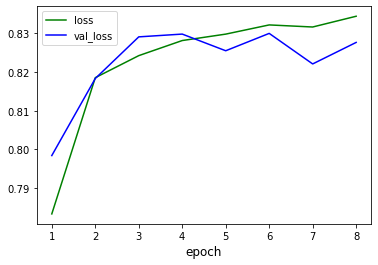

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(history.history['loss']) + 1), history.history['accuracy'],label="loss", color = 'g')
plt.plot(range(1,len(history.history['loss']) + 1), history.history['val_accuracy'],label="val_loss", color = 'b')
plt.xlabel('epoch', fontsize = 12)
plt.legend()

In [22]:
from sklearn.metrics import f1_score, accuracy_score

def get_score(filename):
    ANN_model = tf.keras.models.load_model(filename)
    result1 =  ANN_model.predict(x_valid59)
    print("For model",filename)
    print("F1-score:",f1_score(np.argmax(result1,axis=1), np.argmax(y_valid59,axis=1)))
    print("Accuracy:",accuracy_score(np.argmax(result1,axis=1), np.argmax(y_valid59,axis=1)))
    print("")

get_score("ANN59_1.h5")
get_score("ANN59_2.h5")

For model ANN59_1.h5
F1-score: 0.794392523364486
Accuracy: 0.8265543809353163

For model ANN59_2.h5
F1-score: 0.803030303030303
Accuracy: 0.8276294570865437

